# CitiBike 

## Investigation Overview
In this Investigation, I wanted to to look at when and what effects the number of trips. The Other question I asked is there variables effect the trips-duration.

## Dateset Overview
The Dataset contains over 17 million trips for year 2018. It has 
trip-duration, start-startion, end-station, uesr-type, birth-year and gender variables. 
The dataset can be [here](https://www.citibikenyc.com/system-data)

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
# import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob


In [3]:
#load data set in pandas dataframe
files = glob.glob('data/*.csv')
df = pd.DataFrame()
columns = ['tripduration', 'starttime', 'start station id', 'end station id',
           'usertype', 'birth year', 'gender']
for file in files:
    df_tmp = pd.read_csv(file, usecols=columns)
    df = pd.concat([df, df_tmp])

In [4]:
# replace spaces in column names to underscore
df.columns = [col.strip().replace(' ', '_') for col in df.columns]

# change starttime column from string to datetime
df.starttime = pd.to_datetime(df.starttime)

# create dummy variables
df['month'] = df.starttime.dt.month_name()
df['month_day'] = df.starttime.dt.day
df['week_day'] = df.starttime.dt.day_name()
df['hour'] = df.starttime.dt.hour

In [5]:
# setting defualt color for all plots
base_color = sns.color_palette()[0]

## Distributin of trip_duration

The plot is skewed to right, Most of trips are around 200 to 700 seconds long. The trip_duration has outliers over 4000 seconds trip long.

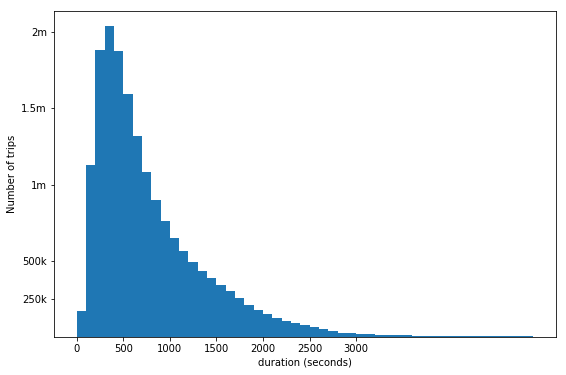

In [6]:
# starting plotting trip duration distribution
plt.figure(figsize=(9,6))
bins = np.arange(0, 5000, 100)
df.tripduration.plot(kind='hist', bins=bins)
plt.yticks([25e4,5e5,1e6,15e5,2e6],['250k','500k','1m','1.5m','2m'])
plt.xticks(range(0,3500,500))
plt.ylabel('Number of trips')
plt.xlabel('duration (seconds)');

## No. Trips Each Month

As we can see there is a peak from May to October.

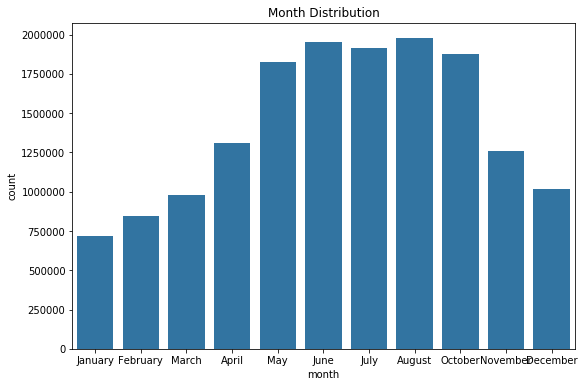

In [7]:
# lets plot how many total trips each month
plt.figure(figsize=(9,6))
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'October', 'November', 'December']

sns.countplot(df.month, order=month_order, color=base_color);
plt.title('Month Distribution')
plt.show()

## Trips Taken By Hour For Weekends And Business Days

It is clear that business days has two spikes first one at 7-8 and another one at 17-18. The weekends has wide range spike form 10-19.

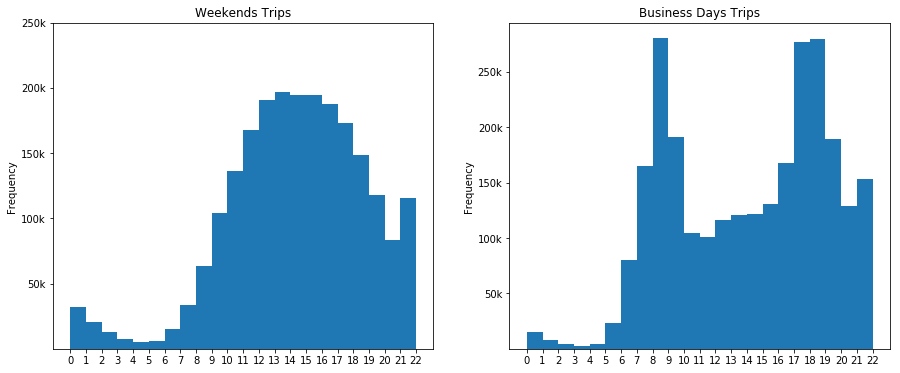

In [8]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
df.query('week_day == "Saturday"').hour.plot(kind='hist',bins=np.arange(0,23,1))
plt.title('Weekends Trips')
plt.yticks([5e4,1e5,15e4,2e5,25e4],['50k','100k','150k','200k','250k'])
plt.xticks(range(0,23,1),range(0,23,1))

plt.subplot(1,2,2)
df.query('week_day == "Tuesday"').hour.plot(kind='hist',bins=np.arange(0,23,1))
plt.title('Business Days Trips')
plt.yticks([5e4,1e5,15e4,2e5,25e4],['50k','100k','150k','200k','250k'])
plt.xticks(range(0,23,1),range(0,23,1))

plt.show()

## No. Tripe For Each Week Day

As we can see business days have more trips that weekends.

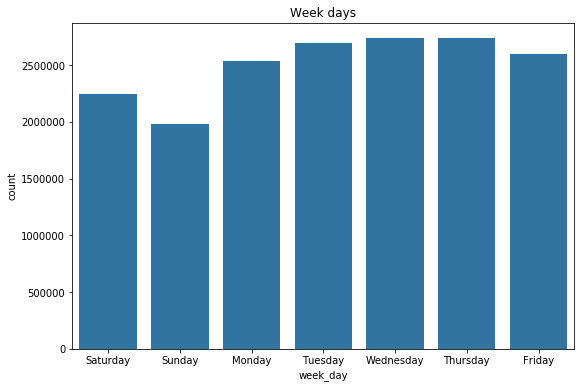

In [9]:
# first let's order week days
week_day_order = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

plt.figure(figsize=(9,6))

# lets plot total trips for week days 
sns.countplot(df.week_day, order=week_day_order, color=base_color);
plt.title('Week days')
plt.show()

## Gender Distribution

The majority of users are Male with 68% and the Female are 23%. The other 8% are unkown.

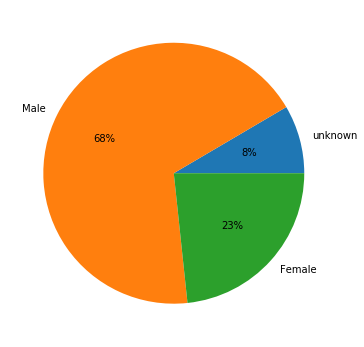

In [10]:
plt.figure(figsize=(9,6))
# lets plot gender distribution of the dataset
label = ['unknown', 'Male', 'Female']
df.groupby('gender').size().plot(kind='pie',labels=label,  autopct='%1.0f%%')
plt.ylabel('');

## User Type Distribution

Subscribers made 89% perecente of the trips, and Customers made 11%.

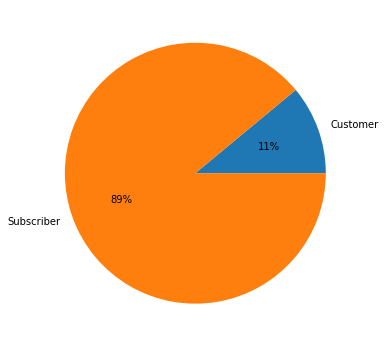

In [11]:
plt.figure(figsize=(9,6))
# lets plot user-type distribution 
df.groupby('usertype').size().plot(kind='pie', autopct='%1.0f%%')
plt.ylabel('');

## Birth year Distribution

As shown below the majority of trips has been made by people who born between 1984-1994. There is spike in year 1969, this might cuased by filling null values with this specific year.

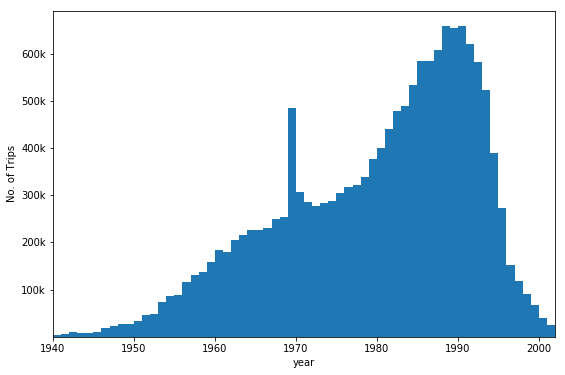

In [15]:
# let's plot the birth-year distribution
plt.figure(figsize=(9,6))

max_birth = df.birth_year.max()
bins = np.arange(1940, max_birth + 1, 1)

plt.hist(df.query('usertype == "Subscriber"').birth_year,bins=bins, color=base_color)
plt.xlim(1940, max_birth)
plt.yticks([1e5,2e5,3e5,4e5,5e5,6e5], ['100k','200k','300k','400k','500k','600k']);
plt.xlabel('year')
plt.ylabel('No. of Trips')
plt.show()

## Trip Duration Each Month
The plot shows from April to August have longer trip duration. These monthes not only have longer trips, They also have more trips than other months.

In [ ]:
# let's plot the trip-duration for each month
plt.figure(figsize=(9,6))

plt.title('Trip Duration For Each Month')
sns.boxplot(df.month, df.tripduration, showfliers=False, order=month_order, color=base_color)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Month')
plt.show()

##  Trip Duration Each Week Day
The trips duration in weekends are longer than business days. 

In [ ]:
plt.figure(figsize=(9,6))

sns.boxplot(df.week_day, df.tripduration, showfliers=False, order=week_day_order, color=base_color)
plt.title('Trip duration For Each Week day')
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Week Day')
plt.show()

## Conclusion
There are over 17 million trips made in 2018. Most of the trips taken by male with 68% and trips taken by Female are 23% The other 8% is known gender. Subscribers taken 89% of trips and Customers taken 11%.
Before I started the exploration, I asked two qutions And I found their answers.
### In order to predict future number of trips, What variables effect the number of trips?
The time is import to predict the number of trips will be made. There is a peak from May to October. And there is more trips during business days than weekends. It is clear that business days has two spikes first one at 7-8 and another one at 17-18. The weekends has wide range spike form 10-19.
### Does the trip duration has any correlation with other variables ?
Yes, Time is really import to predict the the durtion of trips. We saw that from April to August have longer trips. Trips taken on weekends are longer than business days.